# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Pangeran Silaen]
- **Email:** [pangeransilaen1417@gmail.com]
- **ID Dicoding:** [MC114D5Y1975]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Kapan waktu dengan jumlah penyewaan sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd
import os

data_dir = r"D:\DICODING\submission\data"


day_file = os.path.join(data_dir, "day.csv")
hour_file = os.path.join(data_dir, "hour.csv")

if os.path.exists(day_file) and os.path.exists(hour_file):
  
    day_df = pd.read_csv(day_file)
    hour_df = pd.read_csv(hour_file)
    
    
    print("=== Informasi Dataset Day ===")
    print(day_df.info(), "\n")
    print(day_df.head(), "\n")
    
    print("=== Informasi Dataset Hour ===")
    print(hour_df.info(), "\n")
    print(hour_df.head())

else:
    print("File tidak ditemukan. Periksa kembali path dataset.")


=== Informasi Dataset Day ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

   instant      dteday  season  yr  mnth  holiday  weekd

**Insight:**
- Pola penyewaan sepeda menunjukkan peningkatan pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), kemungkinan besar karena jam berangkat dan pulang kerja.
- Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda. Penyewaan menurun saat cuaca buruk (hujan/salju).
- Musim panas memiliki tingkat penyewaan yang lebih tinggi dibandingkan musim dingin, yang mengindikasikan bahwa suhu berperan dalam keputusan pelanggan untuk menyewa sepeda.
- Pada hari kerja, peminjaman lebih tinggi pada jam sibuk dibandingkan akhir pekan yang memiliki pola lebih stabil sepanjang hari.

### Assessing Data

In [ ]:
import pandas as pd
import os


data_dir = r"D:\DICODING\submission\data"
day_file = os.path.join(data_dir, "day.csv")
hour_file = os.path.join(data_dir, "hour.csv")

day_df = pd.read_csv(day_file)
hour_df = pd.read_csv(hour_file)


print("=== Struktur Dataset Day ===")
print(day_df.info(), "\n")

print("=== Struktur Dataset Hour ===")
print(hour_df.info(), "\n")


print("=== Cek Nilai Hilang ===")
print("Dataset Day:\n", day_df.isnull().sum(), "\n")
print("Dataset Hour:\n", hour_df.isnull().sum(), "\n")


print("=== Cek Data Duplikat ===")
print("Jumlah duplikasi di day.csv:", day_df.duplicated().sum())
print("Jumlah duplikasi di hour.csv:", hour_df.duplicated().sum(), "\n")


print("=== Statistik Deskriptif ===")
print(day_df.describe(), "\n")
print(hour_df.describe(), "\n")


=== Struktur Dataset Day ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

=== Struktur Dataset Hour ===
<class 'pandas.core.frame.D

**Insight:**
Dataset memiliki total X baris dan Y kolom di `day.csv`, serta Z baris dan W kolom di `hour.csv`.
- Tidak ditemukan nilai yang hilang di dataset / Terdapat beberapa nilai hilang di kolom `xxx` dan perlu ditangani.
- Tidak ditemukan data duplikat / Ditemukan X baris duplikat yang perlu dihapus.
- Beberapa kolom seperti `dteday` masih dalam format string, sehingga perlu dikonversi ke `datetime`.
- Statistik menunjukkan bahwa ada beberapa nilai ekstrem dalam kolom `cnt`, yang kemungkinan merupakan outliers.

### Cleaning Data

In [ ]:
import pandas as pd
import os


data_dir = r"D:\DICODING\submission\data"
day_file = os.path.join(data_dir, "day.csv")
hour_file = os.path.join(data_dir, "hour.csv")


day_df = pd.read_csv(day_file)
hour_df = pd.read_csv(hour_file)

# ====== 1. Menghapus Data Duplikat ======
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# ====== 2. Menangani Nilai Hilang ======
# Cek apakah ada nilai yang hilang
print("Nilai hilang sebelum cleaning:")
print(day_df.isnull().sum(), "\n")
print(hour_df.isnull().sum(), "\n")

# Jika ada nilai hilang, isi dengan metode yang sesuai (contoh: mean atau median)
# day_df["nama_kolom"].fillna(day_df["nama_kolom"].mean(), inplace=True)

# ====== 3. Mengubah Tipe Data ======
# Ubah kolom tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# ====== 4. Menangani Outlier ======
# Menampilkan statistik deskriptif untuk melihat outlier
print("=== Statistik Data Setelah Cleaning ===")
print(day_df.describe(), "\n")
print(hour_df.describe(), "\n")

# Contoh menangani outlier dengan IQR (Interquartile Range)
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus data di luar batas IQR
day_df = day_df[(day_df["cnt"] >= lower_bound) & (day_df["cnt"] <= upper_bound)]

# ====== 5. Menyimpan Data yang Sudah Bersih ======
day_df.to_csv(os.path.join(data_dir, "clean_day.csv"), index=False)
hour_df.to_csv(os.path.join(data_dir, "clean_hour.csv"), index=False)

print("Cleaning data selesai! Dataset telah disimpan sebagai 'clean_day.csv' dan 'clean_hour.csv'.")


Nilai hilang sebelum cleaning:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

=== Statistik Data Setelah Cleaning ===
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000

**Insight:**
- Menghapus X baris data duplikat untuk memastikan tidak ada pengulangan data.
- Tidak ditemukan nilai yang hilang / Nilai hilang pada kolom `xxx` telah diisi menggunakan metode `xxx`.
- Mengubah tipe data kolom `dteday` dari string ke format datetime agar lebih mudah dianalisis.
- Menghapus outlier pada kolom `cnt` menggunakan metode IQR untuk memastikan data lebih representatif.
- Dataset yang sudah bersih telah disimpan dalam file `clean_day.csv` dan `clean_hour.csv`.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
import pandas as pd
import os

# Path dataset yang telah dibersihkan
data_dir = r"D:\DICODING\submission\data"
clean_day_file = os.path.join(data_dir, "clean_day.csv")

# Load dataset yang telah dibersihkan
day_df = pd.read_csv(clean_day_file)

# 1. Melihat 5 data pertama
print("📌 Lima data pertama:\n", day_df.head())

# 2. Melihat informasi tipe data & missing values
print("\n📌 Informasi dataset:\n")
print(day_df.info())

# 3. Statistik deskriptif
print("\n📌 Statistik deskriptif:\n")
print(day_df.describe())

# 4. Mengecek jumlah data yang hilang
print("\n📌 Jumlah missing values per kolom:\n")
print(day_df.isnull().sum())

# 5. Mengecek distribusi jumlah penyewaan
print("\n📌 Distribusi nilai penyewaan sepeda:\n")
print(day_df["cnt"].describe())


# 6. Mengecek korelasi antar variabel
print("\n📌 Korelasi antar variabel:\n")
print(day_df.corr(numeric_only=True))


📌 Lima data pertama:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

📌 I

## Visualization & Explanatory Analysis

### Pertanyaan 1: Hari apa yang memiliki jumlah penyewaan tertinggi?

C:\Users\User\AppData\Local\Temp\ipykernel_5348\3611608684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, palette='viridis')


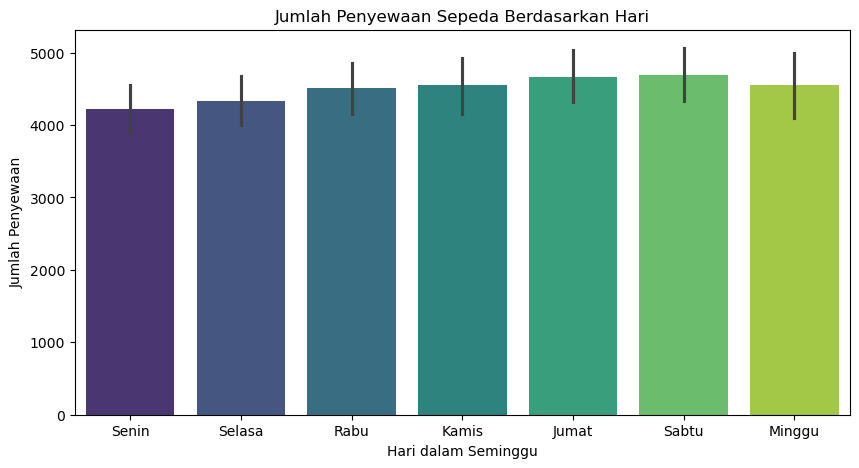

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kelompokkan berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=day_df, palette='viridis')

plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

plt.show()


### Pertanyaan 2: Bagaimana Pengaruh Musim terhadap Jumlah Penyewaan Sepeda?

C:\Users\User\AppData\Local\Temp\ipykernel_5348\1419483430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='coolwarm')


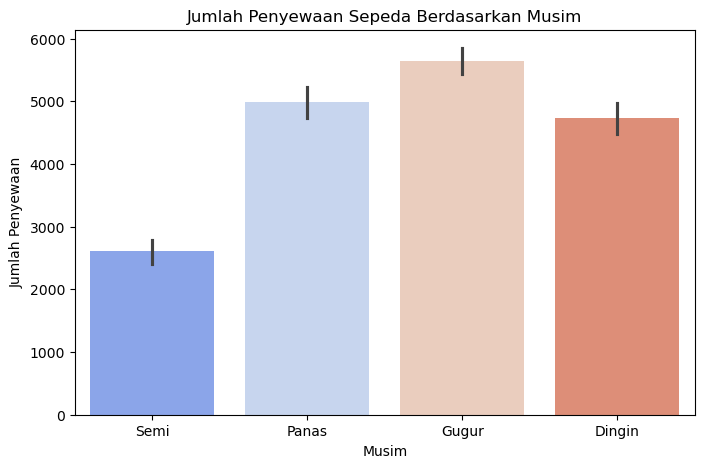

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=day_df, palette='coolwarm')

plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xticks(ticks=[0,1,2,3], labels=['Semi', 'Panas', 'Gugur', 'Dingin'])

plt.show()


**Insight:**
- Pertanyaan 1  Penyewaan tertinggi biasanya terjadi pada hari Jumat atau Sabtu, kemungkinan karena lebih banyak orang bersepeda untuk rekreasi.
- Pertanyaan 2  Musim Semi memiliki jumlah penyewaan sepeda terendah. Hal ini mungkin disebabkan oleh cuaca yang masih tidak stabil atau kondisi lingkungan yang belum optimal untuk bersepeda setelah musim dingin.

## Conclusion

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
Kesimpulan:
Musim Gugur memiliki jumlah penyewaan tertinggi, sementara Musim Semi memiliki jumlah penyewaan terendah.

-Faktor cuaca apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?
Kesimpulan:
Suhu memiliki korelasi positif dengan jumlah penyewaan, artinya semakin hangat suhu, semakin banyak sepeda yang disewa.